## **Import Dependencies**



In [1]:
#!pip install matplotlib numpy pandas scipy seaborn scikit-learn scikit-optimize tpot xgboost yellowbrick

In [2]:


import sklearn
import xgboost
import tpot
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
print(tpot.__version__)


0.12.2


In [4]:
df = pd.read_csv("C:/Users/sakib/Desktop/updated_crime_dataset.csv")

In [5]:
from sklearn.model_selection import train_test_split

df_a, df_b = train_test_split(df, test_size = 0.05, random_state = 5)
df = df_b

df

,TIME OCC,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Vict Descent,Status Desc,LOCATION,LAT,LON,Vict Sex_H,Vict Sex_M,Vict Sex_X
749362,400,10,1133,1,331,36,17,2,5561,34.1111,-118.2553,False,False,False
116014,1500,7,1961,2,626,18,7,0,3479,34.2392,-118.4698,False,True,False
677612,1843,8,1506,1,440,19,7,2,6213,34.2027,-118.3745,False,True,False
690895,620,3,1677,1,331,42,17,2,3465,34.2181,-118.3447,False,True,False
392360,430,9,1331,1,210,55,2,2,6076,34.0223,-118.2719,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977652,750,12,1437,2,354,37,12,2,5467,34.0166,-118.4201,False,True,False
596819,624,14,1841,1,330,35,7,2,6076,33.9356,-118.2848,False,False,False
430057,2000,8,1503,1,420,59,7,2,6116,34.1940,-118.3965,False,False,False
432886,300,5,401,2,740,37,7,2,3024,34.0887,-118.2079,False,True,False


In [6]:
X = df.drop(columns=["Part 1-2"])
y = df["Part 1-2"]


In [7]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = X.select_dtypes(include=['object']).columns
for column in categorical_columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])

In [8]:
le_status = LabelEncoder()
y = le_status.fit_transform(y)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [11]:
non_nan_count = (~np.isnan(y_train)).sum()

print(f"Number of non-NaN values in y_test: {non_nan_count}")

Number of non-NaN values in y_test: 40195


In [12]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
max_iters = [2000, 5000]

In [13]:
results = []

#  **📉 LOGISTIC REGRESSION**

In [14]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, log_loss, confusion_matrix#
results = []

unique_classes = np.unique(y)

for solver in solvers:
    for max_iter in max_iters:
        try:
            model = LogisticRegression(solver=solver, max_iter=max_iter, random_state=42) #Applying Logistic regression
            model.fit(X_train, y_train)

            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            precision = precision_score(y_test, y_pred, average='weighted')
            recall = recall_score(y_test, y_pred, average='weighted')

            try:
                y_train_proba = model.predict_proba(X_train)
                y_test_proba = model.predict_proba(X_test)
                train_loss = log_loss(y_train, y_train_proba)
                val_loss = log_loss(y_test, y_test_proba)
            except AttributeError:
                train_loss, val_loss = None, None

            conf_matrix = confusion_matrix(y_test, y_pred)

            results.append({
                'solver': solver,
                'max_iter': max_iter,
                'accuracy': accuracy,
                'precision': precision,
                'recall': recall,
                'f1': f1,
                'train_loss': train_loss,
                'val_loss': val_loss,
                'confusion_matrix': conf_matrix
            })

        except Exception as e:
            print(f"Error with solver={solver}, max_iter={max_iter}: {e}")

# results to DataFrame
results_df = pd.DataFrame(results)
best_model = results_df.loc[results_df['accuracy'].idxmax()]

In [15]:
print("\nBest Model Results:")
print(f"Solver: {best_model['solver']}")
print(f"Max Iterations: {best_model['max_iter']}")
print(f"Accuracy: {best_model['accuracy']:.4f}")
print(f"Precision: {best_model['precision']:.4f}")
print(f"Recall: {best_model['recall']:.4f}")
print(f"F1 Score: {best_model['f1']:.4f}")

print("\nConfusion Matrix:")
print(best_model['confusion_matrix'])


Best Model Results:
Solver: lbfgs
Max Iterations: 2000
Accuracy: 0.9031
Precision: 0.9039
Recall: 0.9031
F1 Score: 0.9021

Confusion Matrix:
[[5773  299]
 [ 675 3302]]


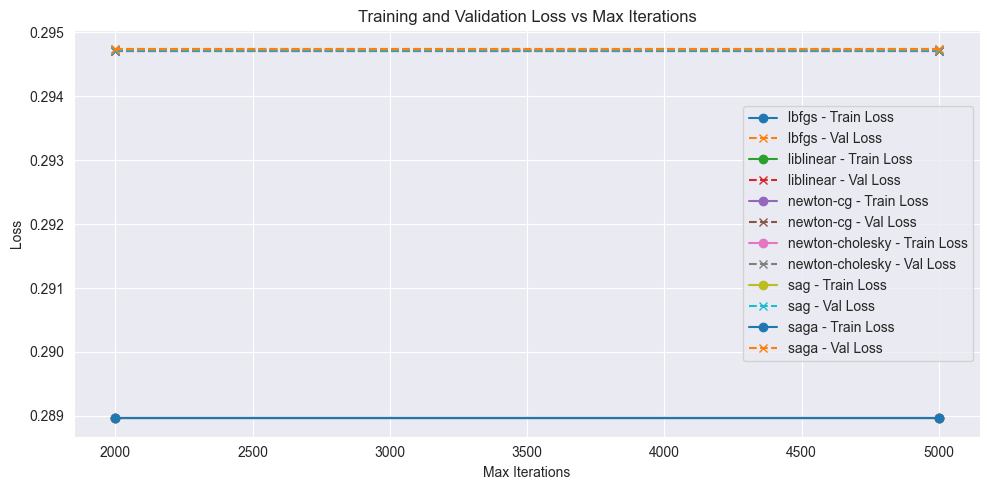

In [16]:
plt.figure(figsize=(10, 5))
for solver in solvers:
    solver_results = results_df[results_df['solver'] == solver]
    plt.plot(solver_results['max_iter'], solver_results['train_loss'], marker='o', label=f'{solver} - Train Loss')
    plt.plot(solver_results['max_iter'], solver_results['val_loss'], marker='x', linestyle='--', label=f'{solver} - Val Loss')
plt.xlabel('Max Iterations')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs Max Iterations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
print(results_df['solver'].value_counts())

solver
lbfgs              2
liblinear          2
newton-cg          2
newton-cholesky    2
sag                2
saga               2
Name: count, dtype: int64


In [18]:
print(X_train.dtype)  # Check data type of the whole array
print(X_train[0])  # Check the data type of a single row


float64
[-1.26860339 -0.95606142 -0.90549056  0.04449984  0.01521173  1.25549909
  0.4410659   0.99385827 -0.16260918 -0.03747633 -0.00997619 -0.95881258
  2.41749853]


### **LOGISTIC REGRESSION HYPERPARAMETER TUNING**

In [19]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from tpot import TPOTClassifier
from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, log_loss
import warnings

warnings.filterwarnings('ignore')

# Define shared metric function
def evaluate_model(model, X_train, y_train, X_test, y_test, label=''):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    try:
        train_loss = log_loss(y_train, model.predict_proba(X_train))
        val_loss = log_loss(y_test, model.predict_proba(X_test))
    except:
        train_loss = val_loss = None
    return {
        'method': label,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'train_loss': train_loss,
        'val_loss': val_loss
    }

# Default Results already obtained
comparison_results = [
    {
        'method': 'Default (Best Solver)',
        'accuracy': best_model['accuracy'],
        'precision': best_model['precision'],
        'recall': best_model['recall'],
        'f1': best_model['f1'],
        'train_loss': best_model['train_loss'],
        'val_loss': best_model['val_loss']
    }
]

# Grid Search
param_grid = {
    'solver': ['liblinear', 'saga', 'sag', 'newton-cg', 'newton-cholesky'],
    'C': [0.01, 0.1, 1, 10],
    'max_iter': [100, 500, 1000]
}
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_result = evaluate_model(grid_search, X_train, y_train, X_test, y_test, 'Grid Search')
comparison_results.append(grid_result)

# Random Search
param_dist = {
    'solver': ['liblinear', 'saga', 'sag', 'newton-cg', 'newton-cholesky'],
    'C': uniform(0.01, 10),
    'max_iter': [100, 500, 1000, 2000]
}
random_search = RandomizedSearchCV(LogisticRegression(random_state=42), param_distributions=param_dist, n_iter=20, cv=3, scoring='accuracy')
random_result = evaluate_model(random_search, X_train, y_train, X_test, y_test, 'Random Search')
comparison_results.append(random_result)

# Bayesian Optimization
bayes_search = BayesSearchCV(
    LogisticRegression(random_state=42),
    {
        'solver': ['liblinear', 'saga', 'sag', 'newton-cg', 'newton-cholesky'],
        'C': (1e-3, 1e+2, 'log-uniform'),
        'max_iter': (100, 2000)
    },
    n_iter=20,
    cv=3,
    scoring='accuracy'
)
bayes_result = evaluate_model(bayes_search, X_train, y_train, X_test, y_test, 'Bayesian Optimization')
comparison_results.append(bayes_result)

# Genetic Algorithm (TPOT)

# tpt = TPOTClassifier(generations=5, population_size=20, verbosity=0, scoring='accuracy', random_state=42, max_time_mins=5)
# tpt.fit(X_train, y_train)
# tpt_pred = tpt.predict(X_test)
# comparison_results.append({
#     'method': 'Genetic Algorithm (TPOT)',
#     'accuracy': accuracy_score(y_test, tpt_pred),
#     'precision': precision_score(y_test, tpt_pred, average='weighted'),
#     'recall': recall_score(y_test, tpt_pred, average='weighted'),
#     'f1': f1_score(y_test, tpt_pred, average='weighted'),
#     'train_loss': None,
#     'val_loss': log_loss(y_test, tpt.fitted_pipeline_.predict_proba(X_test))
#})


# Display comparison
comparison_df = pd.DataFrame(comparison_results)
print(comparison_df.sort_values(by='accuracy', ascending=False))


                  method  accuracy  precision    recall        f1  train_loss  \
3  Bayesian Optimization  0.908747   0.910322  0.908747  0.907679    0.310081   
1            Grid Search  0.905264   0.906331  0.905264  0.904272    0.289751   
0  Default (Best Solver)  0.903075   0.903885  0.903075  0.902126    0.288968   
2          Random Search  0.902975   0.903774  0.902975  0.902028    0.288964   

   val_loss  
3  0.314226  
1  0.295251  
0  0.294741  
2  0.294725  


## **🌲 RANDOM FOREST**

In [20]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, log_loss, confusion_matrix

from sklearn.ensemble import RandomForestClassifier

results = []

n_estimators_list = [50, 100, 200]
max_depth_list = [None, 10, 20]

for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        try:
            model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42) #Applying Random Forest
            model.fit(X_train, y_train)

            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            precision = precision_score(y_test, y_pred, average='weighted')
            recall = recall_score(y_test, y_pred, average='weighted')

            try:
                y_train_proba = model.predict_proba(X_train)
                y_test_proba = model.predict_proba(X_test)
                train_loss = log_loss(y_train, y_train_proba)
                val_loss = log_loss(y_test, y_test_proba)
            except AttributeError:
                train_loss, val_loss = None, None

            conf_matrix = confusion_matrix(y_test, y_pred)

            results.append({
                'n_estimators': n_estimators,
                'max_depth': max_depth,
                'accuracy': accuracy,
                'precision': precision,
                'recall': recall,
                'f1': f1,
                'train_loss': train_loss,
                'val_loss': val_loss,
                'confusion_matrix': conf_matrix
            })

        except Exception as e:
            print(f"Error with n_estimators={n_estimators}, max_depth={max_depth}: {e}")

# results to DataFrame
results_df = pd.DataFrame(results)
best_model = results_df.loc[results_df['accuracy'].idxmax()]


In [21]:
print("\nBest Random Forest Model Results:")
print(f"Number of Estimators (n_estimators): {best_model['n_estimators']}")
print(f"Maximum Depth (max_depth): {best_model['max_depth']}")
print(f"Accuracy: {best_model['accuracy']:.4f}")
print(f"Precision: {best_model['precision']:.4f}")
print(f"Recall: {best_model['recall']:.4f}")
print(f"F1 Score: {best_model['f1']:.4f}")
print(f"Training Log Loss: {best_model['train_loss']:.4f}" if best_model['train_loss'] is not None else "Training Log Loss: N/A")
print(f"Validation Log Loss: {best_model['val_loss']:.4f}" if best_model['val_loss'] is not None else "Validation Log Loss: N/A")

# Print Confusion Matrix
print("\nConfusion Matrix:")
print(best_model['confusion_matrix'])


Best Random Forest Model Results:
Number of Estimators (n_estimators): 50
Maximum Depth (max_depth): nan
Accuracy: 0.9923
Precision: 0.9923
Recall: 0.9923
F1 Score: 0.9923
Training Log Loss: 0.0145
Validation Log Loss: 0.0446

Confusion Matrix:
[[6027   45]
 [  32 3945]]


### **RANDOM FOREST HYPERPARAMETER TUNING**

In [22]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
from skopt import BayesSearchCV
from tpot import TPOTClassifier
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, log_loss
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

# Define shared metric function
def evaluate_model(model, X_train, y_train, X_test, y_test, label=''):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    try:
        train_loss = log_loss(y_train, model.predict_proba(X_train))
        val_loss = log_loss(y_test, model.predict_proba(X_test))
    except:
        train_loss = val_loss = None
    return {
        'method': label,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'train_loss': train_loss,
        'val_loss': val_loss
    }

comparison_results = [
    {
        'method': 'Default (Best Params)',
        'accuracy': best_model['accuracy'],
        'precision': best_model['precision'],
        'recall': best_model['recall'],
        'f1': best_model['f1'],
        'train_loss': best_model['train_loss'],
        'val_loss': best_model['val_loss']
    }
]

# Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_result = evaluate_model(grid_search, X_train, y_train, X_test, y_test, 'Grid Search')
comparison_results.append(grid_result)

# Random Search
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [None, 5, 10, 20, 30]
}
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=20, cv=3, scoring='accuracy')
random_result = evaluate_model(random_search, X_train, y_train, X_test, y_test, 'Random Search')
comparison_results.append(random_result)

# Bayesian Optimization
bayes_search = BayesSearchCV(
    RandomForestClassifier(random_state=42),
    {
        'n_estimators': (50, 300),
        'max_depth': (1, 30)
    },
    n_iter=20,
    cv=3,
    scoring='accuracy'
)
bayes_result = evaluate_model(bayes_search, X_train, y_train, X_test, y_test, 'Bayesian Optimization')
comparison_results.append(bayes_result)

# # Genetic Algorithm (TPOT)
# tpt = TPOTClassifier(generations=5, population_size=20, verbosity=0, scoring='accuracy', random_state=42, max_time_mins=5)
# tpt.fit(X_train, y_train)
# tpt_pred = tpt.predict(X_test)
# comparison_results.append({
#     'method': 'Genetic Algorithm (TPOT)',
#     'accuracy': accuracy_score(y_test, tpt_pred),
#     'precision': precision_score(y_test, tpt_pred, average='weighted'),
#     'recall': recall_score(y_test, tpt_pred, average='weighted'),
#     'f1': f1_score(y_test, tpt_pred, average='weighted'),
#     'train_loss': None,
#     'val_loss': log_loss(y_test, tpt.fitted_pipeline_.predict_proba(X_test))
# })

# Display comparison
comparison_df = pd.DataFrame(comparison_results)
print(comparison_df.sort_values(by='accuracy', ascending=False))


                  method  accuracy  precision    recall        f1  train_loss  \
0  Default (Best Params)  0.992338   0.992345  0.992338  0.992340    0.014511   
2          Random Search  0.992338   0.992353  0.992338  0.992341    0.014646   
3  Bayesian Optimization  0.992238   0.992251  0.992238  0.992241    0.015025   
1            Grid Search  0.992139   0.992152  0.992139  0.992142    0.014589   

   val_loss  
0  0.044600  
2  0.045281  
3  0.046193  
1  0.045220  


## **⚡ XGBoost**

In [23]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, log_loss, confusion_matrix
from xgboost import XGBClassifier

results = []

n_estimators_list = [50, 100, 200]
max_depth_list = [3, 6, 10]  

for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        try:                                            #Applying XGBoost
            model = XGBClassifier(
                n_estimators=n_estimators,
                max_depth=max_depth,
                use_label_encoder=False,
                eval_metric='logloss',
                random_state=42
            )  
            model.fit(X_train, y_train)

            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            precision = precision_score(y_test, y_pred, average='weighted')
            recall = recall_score(y_test, y_pred, average='weighted')

            try:
                y_train_proba = model.predict_proba(X_train)
                y_test_proba = model.predict_proba(X_test)
                train_loss = log_loss(y_train, y_train_proba)
                val_loss = log_loss(y_test, y_test_proba)
            except AttributeError:
                train_loss, val_loss = None, None

            conf_matrix = confusion_matrix(y_test, y_pred)

            results.append({
                'n_estimators': n_estimators,
                'max_depth': max_depth,
                'accuracy': accuracy,
                'precision': precision,
                'recall': recall,
                'f1': f1,
                'train_loss': train_loss,
                'val_loss': val_loss,
                'confusion_matrix': conf_matrix
            })

        except Exception as e:
            print(f"Error with n_estimators={n_estimators}, max_depth={max_depth}: {e}")

# results to DataFrame
results_df = pd.DataFrame(results)
best_model = results_df.loc[results_df['accuracy'].idxmax()]


In [24]:
print("\nBest XGBoost Model Results:")
print(f"Number of Estimators (n_estimators): {best_model['n_estimators']}")
print(f"Maximum Depth (max_depth): {best_model['max_depth']}")
print(f"Accuracy: {best_model['accuracy']:.4f}")
print(f"Precision: {best_model['precision']:.4f}")
print(f"Recall: {best_model['recall']:.4f}")
print(f"F1 Score: {best_model['f1']:.4f}")
print(f"Training Log Loss: {best_model['train_loss']:.4f}" if best_model['train_loss'] is not None else "Training Log Loss: N/A")
print(f"Validation Log Loss: {best_model['val_loss']:.4f}" if best_model['val_loss'] is not None else "Validation Log Loss: N/A")

# Print Confusion Matrix
print("\nConfusion Matrix:")
print(best_model['confusion_matrix'])


Best XGBoost Model Results:
Number of Estimators (n_estimators): 50
Maximum Depth (max_depth): 3
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Training Log Loss: 0.0023
Validation Log Loss: 0.0019

Confusion Matrix:
[[6072    0]
 [   0 3977]]


### **XGBoost HYPERPARAMETER TUNING**

In [25]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
from skopt import BayesSearchCV
from tpot import TPOTClassifier
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, log_loss
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

# Define shared metric function
def evaluate_model(model, X_train, y_train, X_test, y_test, label=''):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    try:
        train_loss = log_loss(y_train, model.predict_proba(X_train))
        val_loss = log_loss(y_test, model.predict_proba(X_test))
    except:
        train_loss = val_loss = None
    return {
        'method': label,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'train_loss': train_loss,
        'val_loss': val_loss
    }

# Replace default result if available
comparison_results = [
    {
        'method': 'Default (Best Params)',
        'accuracy': best_model['accuracy'],
        'precision': best_model['precision'],
        'recall': best_model['recall'],
        'f1': best_model['f1'],
        'train_loss': best_model['train_loss'],
        'val_loss': best_model['val_loss']
    }
]

# Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_search = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), param_grid, cv=3, scoring='accuracy')
grid_result = evaluate_model(grid_search, X_train, y_train, X_test, y_test, 'XGBoost - Grid Search')
comparison_results.append(grid_result)

# Random Search
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': uniform(0.01, 0.3)
}
random_search = RandomizedSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), param_dist, n_iter=20, cv=3, scoring='accuracy')
random_result = evaluate_model(random_search, X_train, y_train, X_test, y_test, 'XGBoost - Random Search')
comparison_results.append(random_result)

# Bayesian Optimization
bayes_search = BayesSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    {
        'n_estimators': (50, 200),
        'max_depth': (3, 10),
        'learning_rate': (0.01, 0.3, 'uniform')
    },
    n_iter=20,
    cv=3,
    scoring='accuracy'
)
bayes_result = evaluate_model(bayes_search, X_train, y_train, X_test, y_test, 'XGBoost - Bayesian Optimization')
comparison_results.append(bayes_result)

# Display comparison
comparison_df = pd.DataFrame(comparison_results)
print(comparison_df.sort_values(by='accuracy', ascending=False))


                            method  accuracy  precision  recall   f1  \
0            Default (Best Params)       1.0        1.0     1.0  1.0   
1            XGBoost - Grid Search       1.0        1.0     1.0  1.0   
2          XGBoost - Random Search       1.0        1.0     1.0  1.0   
3  XGBoost - Bayesian Optimization       1.0        1.0     1.0  1.0   

   train_loss  val_loss  
0    0.002257  0.001911  
1    0.001425  0.001091  
2    0.000247  0.000240  
3    0.002412  0.002083  


## **🧠 NEURAL NETWORK**

In [26]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, log_loss, confusion_matrix

results = []

# Hyperparameter grid
hidden_layer_sizes_list = [(50,), (100,), (100, 50)]
learning_rate_init_list = [0.001, 0.01]

for hidden_layer_sizes in hidden_layer_sizes_list:
    for learning_rate_init in learning_rate_init_list:
        try:                                                #Applying Neural Network
            model = MLPClassifier(
                hidden_layer_sizes=hidden_layer_sizes,
                learning_rate_init=learning_rate_init,
                max_iter=300,
                random_state=42
            )
            model.fit(X_train, y_train)

            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            precision = precision_score(y_test, y_pred, average='weighted')
            recall = recall_score(y_test, y_pred, average='weighted')

            try:
                y_train_proba = model.predict_proba(X_train)
                y_test_proba = model.predict_proba(X_test)
                train_loss = log_loss(y_train, y_train_proba)
                val_loss = log_loss(y_test, y_test_proba)
            except AttributeError:
                train_loss, val_loss = None, None

            conf_matrix = confusion_matrix(y_test, y_pred)

            results.append({
                'hidden_layer_sizes': hidden_layer_sizes,
                'learning_rate_init': learning_rate_init,
                'accuracy': accuracy,
                'precision': precision,
                'recall': recall,
                'f1': f1,
                'train_loss': train_loss,
                'val_loss': val_loss,
                'confusion_matrix': conf_matrix
            })

        except Exception as e:
            print(f"Error with hidden_layer_sizes={hidden_layer_sizes}, learning_rate_init={learning_rate_init}: {e}")

# results to DataFrame
results_df = pd.DataFrame(results)
best_model = results_df.loc[results_df['accuracy'].idxmax()]

In [27]:
print("\nBest Neural Network Model Results:")
print(f"Number of hidden_layer_sizes: {best_model['hidden_layer_sizes']}")
print(f"learning_rate_init: {best_model['learning_rate_init']}")
print(f"Accuracy: {best_model['accuracy']:.4f}")
print(f"Precision: {best_model['precision']:.4f}")
print(f"Recall: {best_model['recall']:.4f}")
print(f"F1 Score: {best_model['f1']:.4f}")
print(f"Training Log Loss: {best_model['train_loss']:.4f}" if best_model['train_loss'] is not None else "Training Log Loss: N/A")
print(f"Validation Log Loss: {best_model['val_loss']:.4f}" if best_model['val_loss'] is not None else "Validation Log Loss: N/A")

# Print Confusion Matrix
print("\nConfusion Matrix:")
print(best_model['confusion_matrix'])


Best Neural Network Model Results:
Number of hidden_layer_sizes: (100, 50)
learning_rate_init: 0.001
Accuracy: 0.9849
Precision: 0.9849
Recall: 0.9849
F1 Score: 0.9849
Training Log Loss: 0.0167
Validation Log Loss: 0.0500

Confusion Matrix:
[[6004   68]
 [  84 3893]]


### 🔄 Custom Wrapper for MLPClassifier to Support Bayesian Optimization


In [28]:
from sklearn.base import BaseEstimator, ClassifierMixin

class MLPWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, hidden_layer_sizes='(50,)', activation='relu', solver='adam', alpha=0.0001, learning_rate='constant'):
        self.hidden_layer_sizes = hidden_layer_sizes
        self.activation = activation
        self.solver = solver
        self.alpha = alpha
        self.learning_rate = learning_rate
        self.model = None

    def fit(self, X, y):
        parsed_layers = eval(self.hidden_layer_sizes)  # Convert string to tuple
        self.model = MLPClassifier(
            hidden_layer_sizes=parsed_layers,
            activation=self.activation,
            solver=self.solver,
            alpha=self.alpha,
            learning_rate=self.learning_rate,
            max_iter=300,
            random_state=42
        )
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def predict_proba(self, X):
        return self.model.predict_proba(X)

    @property
    def classes_(self):
        return self.model.classes_


### **⚙️ Neural Network Hyperparameter Tuning**

In [29]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, log_loss
from scipy.stats import randint, uniform
import pandas as pd
import warnings
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

warnings.filterwarnings('ignore')

# Define shared evaluation function 
def evaluate_model(model, X_train, y_train, X_test, y_test, label=''):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    try:
        train_loss = log_loss(y_train, model.predict_proba(X_train))
        val_loss = log_loss(y_test, model.predict_proba(X_test))
    except:
        train_loss = val_loss = None
    return {
        'method': label,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'train_loss': train_loss,
        'val_loss': val_loss
    }


comparison_results = []

comparison_results.append({
    'method': 'Default (Best Params)',
    'accuracy': best_model['accuracy'],
    'precision': best_model['precision'],
    'recall': best_model['recall'],
    'f1': best_model['f1'],
    'train_loss': best_model['train_loss'],
    'val_loss': best_model['val_loss']
})

# ---------------- Grid Search ----------------

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive']
}

grid_search = GridSearchCV(MLPClassifier(max_iter=300), param_grid, cv=3, scoring='accuracy')
grid_result = evaluate_model(grid_search, X_train, y_train, X_test, y_test, 'MLP - Grid Search')
comparison_results.append(grid_result)

# ---------------- Random Search ----------------

param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': uniform(0.0001, 0.01),
    'learning_rate': ['constant', 'adaptive']
}

random_search = RandomizedSearchCV(MLPClassifier(max_iter=300), param_dist, n_iter=20, cv=3, scoring='accuracy')
random_result = evaluate_model(random_search, X_train, y_train, X_test, y_test, 'MLP - Random Search')
comparison_results.append(random_result)

# # ---------------- Bayesian Optimization ----------------
#
# from skopt.space import Categorical, Real
#
# bayes_search = BayesSearchCV(
#     estimator=MLPWrapper(),  # use the wrapper
#     search_spaces={
#         'hidden_layer_sizes': Categorical(['(50,)', '(100,)', '(50, 50)']),
#         'activation': Categorical(['relu', 'tanh']),
#         'solver': Categorical(['adam', 'sgd']),
#         'alpha': Real(1e-5, 1e-2, prior='log-uniform'),
#         'learning_rate': Categorical(['constant', 'adaptive'])
#     },
#     n_iter=20,
#     cv=3,
#     scoring='accuracy',
#     random_state=42
# )
#
#
# bayes_result = evaluate_model(bayes_search, X_train, y_train, X_test, y_test, 'MLP - Bayesian Optimization')
# comparison_results.append(bayes_result)

# ---------------- Show Results ----------------

comparison_df = pd.DataFrame(comparison_results)
print(comparison_df.sort_values(by='accuracy', ascending=False))


                  method  accuracy  precision    recall        f1  train_loss  \
0  Default (Best Params)  0.984874   0.984869  0.984874  0.984869    0.016689   
1      MLP - Grid Search  0.982983   0.983038  0.982983  0.982997    0.031940   
2    MLP - Random Search  0.903373   0.904199  0.903373  0.902424         NaN   

   val_loss  
0  0.050037  
1  0.058361  
2       NaN  


## **K-Nearest Neighbors (KNN)**

In [30]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, log_loss, confusion_matrix


results = []

unique_classes = np.unique(y)

# Define the hyperparameters to tune
n_neighbors_list = [3, 5, 7]
weights_list = ['distance']
algorithms = ['auto']
distance_metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

for n_neighbors in n_neighbors_list:
    for weights in weights_list:
        for algorithm in algorithms:
            for metric in distance_metrics:
                try:                                    #Applying KNN
                    model = KNeighborsClassifier(
                        n_neighbors=n_neighbors,
                        weights=weights,
                        algorithm=algorithm,
                        metric=metric
                    )
                    model.fit(X_train, y_train)

                    y_pred = model.predict(X_test)
                    accuracy = accuracy_score(y_test, y_pred)
                    f1 = f1_score(y_test, y_pred, average='weighted')
                    precision = precision_score(y_test, y_pred, average='weighted')
                    recall = recall_score(y_test, y_pred, average='weighted')

                    try:
                        y_train_proba = model.predict_proba(X_train)
                        y_test_proba = model.predict_proba(X_test)
                        train_loss = log_loss(y_train, y_train_proba)
                        val_loss = log_loss(y_test, y_test_proba)
                    except AttributeError:
                        train_loss, val_loss = None, None

                    conf_matrix = confusion_matrix(y_test, y_pred)

                    results.append({
                        'n_neighbors': n_neighbors,
                        'weights': weights,
                        'algorithm': algorithm,
                        'metric': metric,
                        'accuracy': accuracy,
                        'precision': precision,
                        'recall': recall,
                        'f1': f1,
                        'train_loss': train_loss,
                        'val_loss': val_loss,
                        'confusion_matrix': conf_matrix
                    })

                except Exception as e:
                    print(f"Error with n_neighbors={n_neighbors}, weights={weights}, algorithm={algorithm}, metric={metric}: {e}")

# results to DataFrame
results_df = pd.DataFrame(results)
best_model = results_df.loc[results_df['accuracy'].idxmax()]


ERROR! Session/line number was not unique in database. History logging moved to new session 33


In [61]:
print("\nBest Model Results:")
print(f"N Neighbors: {best_model['n_neighbors']}")
print(f"Weights: {best_model['weights']}")
print(f"Distance Metric: {best_model['metric']}")
print(f"Accuracy: {best_model['accuracy']:.4f}")
print(f"Precision: {best_model['precision']:.4f}")
print(f"Recall: {best_model['recall']:.4f}")
print(f"F1 Score: {best_model['f1']:.4f}")

# Print Confusion Matrix
print("\nConfusion Matrix:")
print(best_model['confusion_matrix'])



Best Model Results:
N Neighbors: 5
Weights: distance
Distance Metric: chebyshev
Accuracy: 0.8706
Precision: 0.8706
Recall: 0.8706
F1 Score: 0.8706

Confusion Matrix:
[[110  13]
 [ 13  65]]


## **KNN Hyperparameter Tuning**

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, log_loss
from scipy.stats import randint
from scipy.stats import uniform
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

# Define shared evaluation function
def evaluate_model(model, X_train, y_train, X_test, y_test, label=''):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    try:
        train_loss = log_loss(y_train, model.predict_proba(X_train))
        val_loss = log_loss(y_test, model.predict_proba(X_test))
    except:
        train_loss = val_loss = None
    return {
        'method': label,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'train_loss': train_loss,
        'val_loss': val_loss
    }

# Collect results
comparison_results = []

comparison_results.append({
    'method': 'Default (Best Params)',
    'accuracy': best_model['accuracy'],
    'precision': best_model['precision'],
    'recall': best_model['recall'],
    'f1': best_model['f1'],
    'train_loss': best_model['train_loss'],
    'val_loss': best_model['val_loss']
})

# ---------------- Grid Search ----------------
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, scoring='accuracy')
grid_result = evaluate_model(grid_search, X_train, y_train, X_test, y_test, 'KNN - Grid Search')
comparison_results.append(grid_result)

# ---------------- Random Search ----------------
param_dist = {
    'n_neighbors': randint(3, 10),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

random_search = RandomizedSearchCV(KNeighborsClassifier(), param_dist, n_iter=20, cv=3, scoring='accuracy')
random_result = evaluate_model(random_search, X_train, y_train, X_test, y_test, 'KNN - Random Search')
comparison_results.append(random_result)

# ---------------- Bayesian Optimization ----------------
bayes_search = BayesSearchCV(
    KNeighborsClassifier(),
    {
        'n_neighbors': (3, 10),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'chebyshev']
    },
    n_iter=20,
    cv=3,
    scoring='accuracy'
)
bayes_result = evaluate_model(bayes_search, X_train, y_train, X_test, y_test, 'KNN - Bayesian Optimization')
comparison_results.append(bayes_result)

# ---------------- Show Results ----------------
comparison_df = pd.DataFrame(comparison_results)
print(comparison_df.sort_values(by='accuracy', ascending=False))


                        method  accuracy  precision    recall        f1  \
0        Default (Best Params)  0.870647   0.870647  0.870647  0.870647   
3  KNN - Bayesian Optimization  0.855721   0.855419  0.855721  0.855548   
1            KNN - Grid Search  0.845771   0.846167  0.845771  0.845948   
2          KNN - Random Search  0.845771   0.847162  0.845771  0.846274   

     train_loss  val_loss  
0  2.220446e-16  1.148954  
3  2.220446e-16  0.354617  
1  2.742622e-01  0.348147  
2  2.220446e-16  0.348271  
